Перші рядки таблиці:
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —

Кількість рядків та стовпців:
(28, 9)

Типи всіх стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

Частка пропусків у кожній колонці:
Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

Регіони з рівнем народжуваності у 2019 році вище середнього:
['Волинська', 'Закарпатська', 'Івано

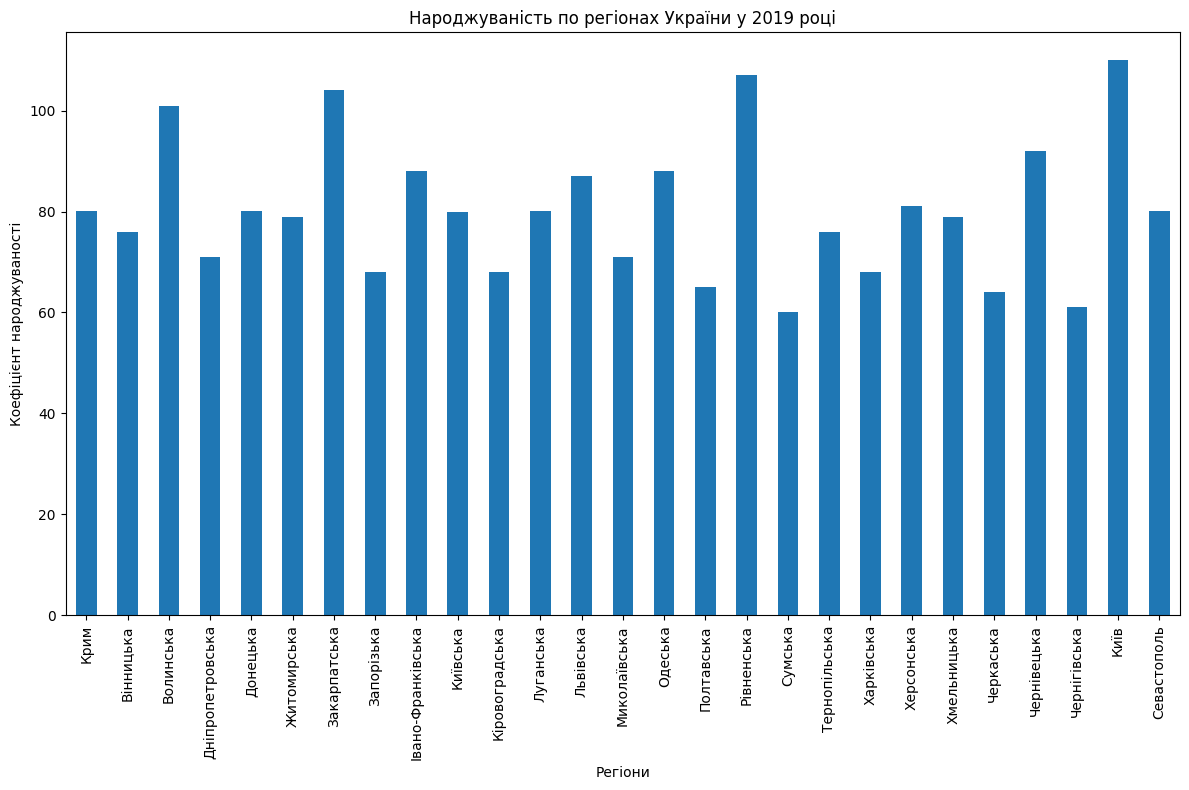

In [10]:
# Імпорти
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from io import StringIO

# URL сторінки
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

# Отримуємо HTML вміст сторінки
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Знаходимо таблицю за заголовком
tables = soup.find_all('table', {'class': 'wikitable'})

target_table = None
for table in tables:
    if table.find('caption') and 'Коефіцієнт народжуваності в регіонах України (1950—2019)' in table.find('caption').text:
        target_table = table
        break

# Перевірка наявності таблиці
if target_table is None:
    raise ValueError("Таблиця з назвою 'Коефіцієнт народжуваності в регіонах України (1950—2019)' не знайдена.")

# Перетворюємо таблицю в датафрейм pandas
table_html = str(target_table)
df = pd.read_html(StringIO(table_html))[0]

# Перегляд перших рядків таблиці
print("Перші рядки таблиці:")
print(df.head())

# Кількість рядків та стовпців
print("\nКількість рядків та стовпців:")
print(df.shape)

# Замінюємо "—" на NaN
df.replace("—", np.nan, inplace=True)

# Визначення типів всіх стовпців
print("\nТипи всіх стовпців:")
print(df.dtypes)

# Конвертація колонок у числові типи, де це можливо
df = df.apply(pd.to_numeric, errors='ignore')

# Частка пропусків
missing_percentage = df.isnull().mean() * 100
print("\nЧастка пропусків у кожній колонці:")
print(missing_percentage)

# Видалити останній рядок
df = df[:-1]

# Замінити пропуски середніми значеннями
df.fillna(df.mean(numeric_only=True), inplace=True)

# Середнє значення по Україні у 2019 році
mean_birth_rate_2019 = df['2019'].mean()

# Регіони з рівнем народжуваності вище середнього
high_birth_rate_regions = df[df['2019'] > mean_birth_rate_2019]['Регіон'].tolist()
print("\nРегіони з рівнем народжуваності у 2019 році вище середнього:")
print(high_birth_rate_regions)

# Регіон з найвищою народжуваністю у 2014 році
max_birth_rate_region_2014 = df.loc[df['2014'].idxmax()]['Регіон']
print("\nРегіон з найвищою народжуваністю у 2014 році:")
print(max_birth_rate_region_2014)

# Побудова стовпчикової діаграми
plt.figure(figsize=(12, 8))
df.set_index('Регіон')['2019'].plot(kind='bar')
plt.title('Народжуваність по регіонах України у 2019 році')
plt.xlabel('Регіони')
plt.ylabel('Коефіцієнт народжуваності')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
